![](http://www.kiplinger.com/kipimages/pages/14024.jpg)

# An Extensive Medicare Data Exploration - Healthcare Analysis

## About Medicare 

In the United States, Medicare is a single-payer, national social insurance program administered by the U.S. federal government since 1966. United States Medicare is funded by a payroll tax, premiums and surtaxes from beneficiaries, and general revenue. It provides health insurance for Americans aged 65 and older who have worked and paid into the system through the payroll tax. It also provides health insurance to younger people with some disability status as determined by the Social Security Administration, as well as people with end stage renal disease and amyotrophic lateral sclerosis.

In 2015, Medicare provided health insurance for over **55 million** (46 million people age 65 and older and 9 million younger people). On average, Medicare covers about half of the health care charges for those enrolled. The enrollees must then cover their remaining costs either with supplemental insurance, separate insurance, or out-of-pocket. Out-of-pocket costs can vary depending on the amount of health care a Medicare enrollee needs. 

## About CMS

The Centers for Medicare & Medicaid Services (CMS), previously known as the Health Care Financing Administration (HCFA), is a federal agency within the United States Department of Health and Human Services (HHS) that administers the Medicare program and works in partnership with state governments to administer Medicaid, the Children's Health Insurance Program (CHIP), and health insurance portability standards. In addition to these programs, CMS has other responsibilities, including the administrative simplification standards from the Health Insurance Portability and Accountability Act of 1996 (HIPAA), quality standards in long-term care facilities (more commonly referred to as nursing homes) through its survey and certification process, clinical laboratory quality standards under the Clinical Laboratory Improvement Amendments, and oversight of HealthCare.gov.

## About the Data-Set

This [public dataset](https://www.kaggle.com/cms/cms-medicare) was created by the Centers for Medicare & Medicaid Services. The data summarizes the utilization and payments for procedures, services, and prescription drugs provided to Medicare beneficiaries by specific inpatient and outpatient hospitals, physicians, and other suppliers. The dataset includes the following data: Common inpatient and outpatient services, All physician and other supplier procedures and services, All Part D prescriptions. Providers determine what they will charge for items, services, and procedures provided to patients and these charges are the amount that providers bill for an item, service, or procedure.



## Contents

1. States having more nursing facilities  
2. HCC Scores - Which State and Which facilities have poor HCC scores  
&nbsp;&nbsp;&nbsp;&nbsp;  2.1 Max and Min HCC Scores for different States   
&nbsp;&nbsp;&nbsp;&nbsp;  2.2 Average HCC scores for different States  
&nbsp;&nbsp;&nbsp;&nbsp;  2.3 Facilities with High HCC scores  
&nbsp;&nbsp;&nbsp;&nbsp;  2.4 Facilities with Low HCC Scores
   

4. Which state has the largest number of stay days  
&nbsp;&nbsp;&nbsp;&nbsp;  4.1 States and their Average Total Stays (of different facilities) and Average length of stays    
  

5. Total Claims, Day Supply and Drug Costs  
&nbsp;&nbsp;&nbsp;&nbsp;  5.1 States having highest claims, supply, and cost      
&nbsp;&nbsp;&nbsp;&nbsp;  5.2 Drugs having highest claims, supply and cost      
&nbsp;&nbsp;&nbsp;&nbsp;  5.3 Nursing Specialities having highest claims, supply, and cost      




In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px

import plotly.graph_objects as go

import statsmodels.formula.api as smf

## 1. ????
![](http://www.arh.org/Uploads/Images/Page/services-skillednursing%5B1%5D.jpg)

In [2]:
nursingFacilities=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/AnalyticsUtilizationManagement/main/data/nursing_facilities_2014.csv')

In [3]:
nursingFacilities.head()

,Unnamed: 0,provider_id,facility_name,street_address,city,state,zip_code,total_stays,distinct_beneficiaries_per_provider,average_length_of_stays_days,...,percent_of_beneficiaries_with_copd,percent_of_beneficiaries_with_depression,percent_of_beneficiaries_with_diabetes,percent_of_beneficiaries_with_hyperlipidemia,percent_of_beneficiaries_with_hypertension,percent_of_beneficiaries_with_ihd,percent_of_beneficiaries_with_osteoporosis,percent_of_beneficiaries_with_ra_oa,percent_of_beneficiaries_with_schizophrenia,percent_of_beneficiaries_with_stroke
0,0,235618,HEARTLAND HEALTH CARE CENTER-CANTON,7025 LILLEY ROAD,CANTON,MI,48187,1104,829,25.1,...,40.0,51.0,47.0,70.0,NaN,68.0,20.0,69.0,10.0,17
1,1,495217,MANORCARE HEALTH SERVICES-FAIR OAKS,12475 LEE JACKSON MEMORIAL HIGHWAY,FAIRFAX,VA,22033,436,350,26.3,...,29.0,43.0,46.0,72.0,NaN,54.0,17.0,53.0,11.0,19
2,2,495121,CHERRYDALE HEALTH AND REHABILITATION CENTER,3710 LEE HIGHWAY,ARLINGTON,VA,22207,353,289,23.1,...,34.0,49.0,49.0,67.0,NaN,50.0,14.0,47.0,24.0,19
3,3,225554,COOLIDGE HOUSE,30 WEBSTER STREET,BROOKLINE,MA,2446,368,297,19.5,...,16.0,55.0,46.0,68.0,NaN,45.0,25.0,65.0,15.0,12
4,4,235663,NOTTING HILL OF WEST BLOOMFIELD,6535 DRAKE ROAD,W BLOOMFIELD,MI,48322,871,697,27.2,...,29.0,50.0,49.0,74.0,NaN,67.0,23.0,70.0,10.0,17


In [23]:
nursingFacilities[['state','total_stays','average_length_of_stays_days','total_snf_medicare_payment_amount','average_age','average_hcc_score','percent_of_beneficiaries_with_stroke']].corr()

,total_stays,average_length_of_stays_days,total_snf_medicare_payment_amount,average_age,average_hcc_score,percent_of_beneficiaries_with_stroke
total_stays,1.000000,-0.199548,0.925025,0.065745,-0.018555,0.043367
average_length_of_stays_days,-0.199548,1.000000,0.004205,-0.127676,0.241927,0.182566
total_snf_medicare_payment_amount,0.925025,0.004205,1.000000,0.034275,0.067240,0.092212
average_age,0.065745,-0.127676,0.034275,1.000000,-0.568711,-0.071557
average_hcc_score,-0.018555,0.241927,0.067240,-0.568711,1.000000,0.322743
percent_of_beneficiaries_with_stroke,0.043367,0.182566,0.092212,-0.071557,0.322743,1.000000


# First Simple Regression

<Axes: xlabel='total_stays', ylabel='total_snf_medicare_payment_amount'>

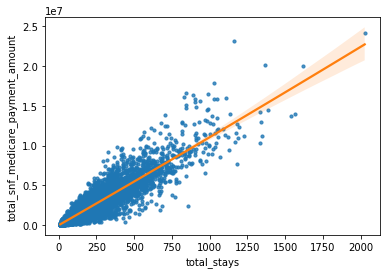

In [31]:
sns.regplot(data=nursingFacilities,y='total_snf_medicare_payment_amount',x='total_stays',order=2,scatter_kws={"s": 10},line_kws={"color": "C1"})

In [49]:
reg = smf.ols(formula='total_snf_medicare_payment_amount ~ total_stays', data=nursingFacilities)

In [50]:
results=reg.fit()

In [51]:
b = results.params
print(f'b: \n{b}\n')

b: 
Intercept     -30746.991714
total_stays    11037.150745
dtype: float64



In [52]:
# Inspect the results
print(results.summary())

                                    OLS Regression Results                                   
Dep. Variable:     total_snf_medicare_payment_amount   R-squared:                       0.856
Model:                                           OLS   Adj. R-squared:                  0.856
Method:                                Least Squares   F-statistic:                 8.907e+04
Date:                               Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                                       10:52:41   Log-Likelihood:            -2.2329e+05
No. Observations:                              15026   AIC:                         4.466e+05
Df Residuals:                                  15024   BIC:                         4.466e+05
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                  coef    std err          t      P>|t|     

## Based on the previous we have fitted the following model:

 total_snf_medicare_payment_amount=-30746.99+11037*total_stays+u 



## How do we interpret the equation?

#### We can write the predicted change in total medicare payment amount as a function of the change of total stays:

 $\Delta$total_snf_medicare_payment_amount=11037$\Delta$total_stays

#### This means that if the total stays increases by one unit , $\Delta$total_stays=1, then total medicare payment is predicted to change by about 11037 dollars.

In [32]:
results.rsquared

0.8556710585880206

### This is not a bad model, it is able to  explain 85%% of the total variation in medicare payments
### Conversely, the current model leaves 15%% of the variation unexplained.

### We would need to include more factors in the model if we want to improve the quality of the model

# Second Simple Regression

<Axes: xlabel='average_hcc_score', ylabel='total_snf_medicare_payment_amount'>

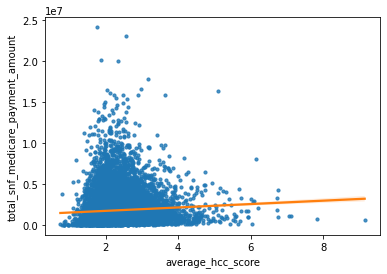

In [69]:
sns.regplot(data=nursingFacilities,y='total_snf_medicare_payment_amount',x='average_hcc_score',order=1,scatter_kws={"s": 10},line_kws={"color": "C1"})

In [70]:
reg = smf.ols(formula='total_snf_medicare_payment_amount ~ average_hcc_score', data=nursingFacilities)

In [71]:
results=reg.fit()

In [74]:
print(results.summary())

                                    OLS Regression Results                                   
Dep. Variable:     total_snf_medicare_payment_amount   R-squared:                       0.005
Model:                                           OLS   Adj. R-squared:                  0.004
Method:                                Least Squares   F-statistic:                     68.24
Date:                               Mon, 20 Mar 2023   Prob (F-statistic):           1.57e-16
Time:                                       11:03:32   Log-Likelihood:            -2.3780e+05
No. Observations:                              15026   AIC:                         4.756e+05
Df Residuals:                                  15024   BIC:                         4.756e+05
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                        coef    std err          t      P>|t

In [72]:
b = results.params
print(f'b: \n{b}\n')

b: 
Intercept            1.321264e+06
average_hcc_score    2.072304e+05
dtype: float64



## Based on the previous we have fitted the following model:

 total_snf_medicare_payment_amount=-6.04E4+2.51E4*average_hcc_score+u 



## How do we interpret the equation?



In [75]:
results.rsquared

0.004521268385520694

### The factor average_hcc_score is statistically significant.
### The model is however not very useful, it only explains 0.004% of the total variance in medicare payments.